In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [17]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [18]:
df = pd.read_csv("sentiment_data.csv")


In [19]:
print(df.head())

                                                text sentiment
0               I love this movie, it was fantastic!  positive
1      This is the worst product I have ever bought.  negative
2  Absolutely wonderful experience, highly recomm...  positive
3           Terrible service, I'm never coming back!  negative
4         It was okay, not great but not bad either.   neutral


In [20]:
nltk.download('stopwords')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [21]:
def preprocess(text):
    text = re.sub(r'[^a-zA-Z]',' ', text).lower()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)
df['cleaned_text'] = df['text'].apply(preprocess)

In [22]:
vectorizer = TfidfVectorizer(max_features = 5000)
x = vectorizer.fit_transform(df['cleaned_text']).toarray()
y= df['sentiment']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       2.0
    positive       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



C:\Users\Santosh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Santosh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Santosh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Santosh\anaconda3\Lib\site-packag

<Axes: >

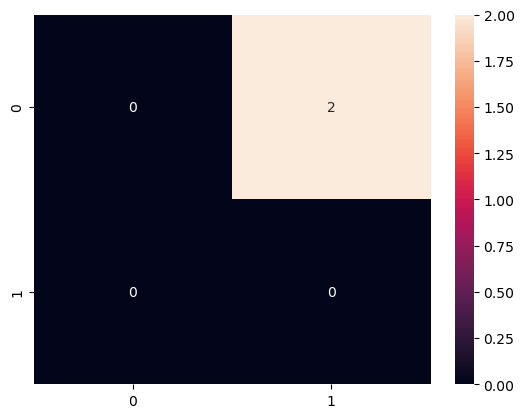

In [24]:
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

In [25]:
accuracy = accuracy_score(y_test,y_pred)
print("Model Accuracy:",accuracy)

Model Accuracy: 0.0
